<a href="https://colab.research.google.com/github/GokulGopinath/Kaggle-Titanic-DataSet-Analysis.ipynb/blob/master/Kaggle_Titanic_DataSet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#installing dependencies
!pip install Kaggle


In [7]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()
#and then choose file ie generated api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gokulpgopinath","key":"8938b526696c518309f26ee7a8313e90"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission
! chmod 600 ~/.kaggle/kaggle.json


In [9]:
# !kaggle competitions download -c titanic#api link copied from kaggle
!kaggle competitions  download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.5MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.23MB/s]


In [0]:
# Creating dataframe
gender_df=pd.read_csv('gender_submission.csv')
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')

In [11]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
test_df[pd.notnull(test_df['Cabin'])].count() #displaying all null values 


PassengerId    91
Pclass         91
Name           91
Sex            91
Age            87
SibSp          91
Parch          91
Ticket         91
Fare           91
Cabin          91
Embarked       91
dtype: int64

In [0]:
test_df.dropna(how='all',inplace=True)
train_df.dropna(how='all',inplace=True)
gender_df.dropna(how='all',inplace=True)

In [14]:
test_df.shape

(418, 11)

In [15]:
gender_df.shape

(418, 2)

In [16]:
train_df.shape

(891, 12)

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Heat Map**

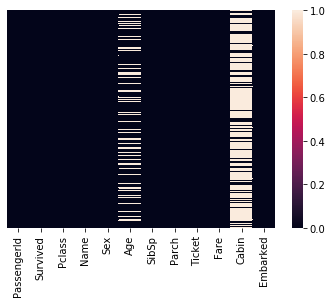

In [18]:
sns.heatmap(train_df.isnull(),yticklabels=False) #yticklabels is made false as we dont want data for all rows ie the records of different person

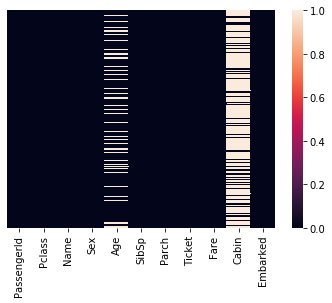

In [19]:
sns.heatmap(test_df.isnull(),yticklabels=False)

So we came to know with the help of heat map that there are null values in cabin age

# Counter Plot

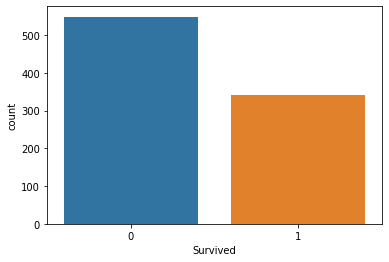

In [20]:
sns.countplot(x='Survived',data=train_df)

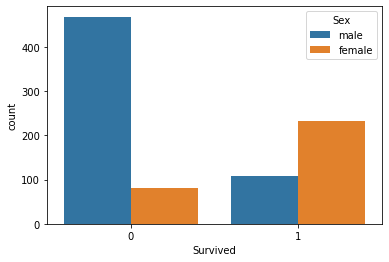

In [21]:
sns.countplot(x='Survived',data=train_df,hue='Sex') #giving the count on the basis of sex

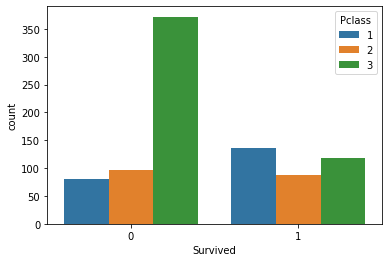

In [22]:
sns.countplot(x='Survived',data=train_df,hue='Pclass') #count of different passenger classes

So from this we came to know that people of lower class died in large no.

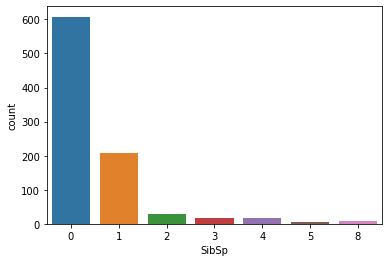

In [23]:
sns.countplot(data=train_df,x='SibSp')  #counting the no. of passengers having sibling or spause

# Histogram

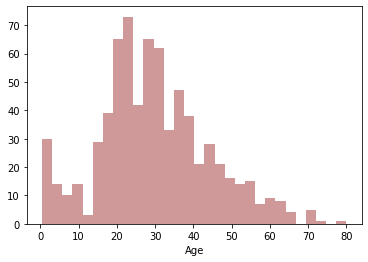

In [24]:
sns.distplot(train_df['Age'].dropna(),color='darkred',bins=30,kde=False) #age on x axis and the count in the ranges are given

So here we see that there are many people in age group 20-40

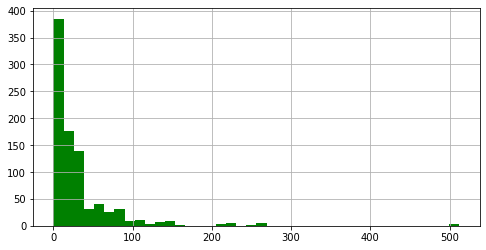

In [21]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4)) #matplotlib fn
#see here x axis is diff fare ranges and no. of passengers in y axis

So many people have got tickets of price btw 0-100

# Data Cleaning

**Box Plot**

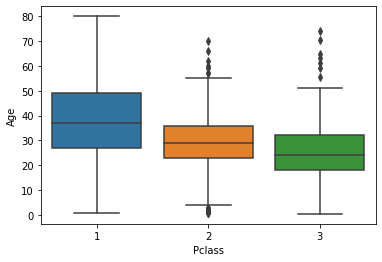

In [25]:
# sns.boxplot(data=train_df,x='Pclass',y='Age',hue='Sex')#hue=sex means of that passenger class(x axis) we are further classifying on basis of sex
sns.boxplot(data=train_df,x='Pclass',y='Age')

See we get to know average age of each passengerclass ie around 38,29,25

In [26]:
set(test_df['Pclass'])


{1, 2, 3}

In [0]:
import math
#for train data set
for i in range(len(train_df)):
  if math.isnan(train_df.iloc[i,5]):
    if train_df.iloc[i]['Pclass']==1  :
      train_df.iloc[i,5]=38
    elif train_df.iloc[i]['Pclass']==2 :
      train_df.iloc[i,5]=29
    elif train_df.iloc[i]['Pclass']==3 :
      train_df.iloc[i,5]=25
# for test data set
for i in range(len(test_df)):
  if math.isnan(test_df.iloc[i,4]):
    if test_df.iloc[i]['Pclass']==1  :
      test_df.iloc[i,4]=38
    elif test_df.iloc[i]['Pclass']==2 :
      test_df.iloc[i,4]=29
    elif test_df.iloc[i]['Pclass']==3 :
      test_df.iloc[i,4]=25




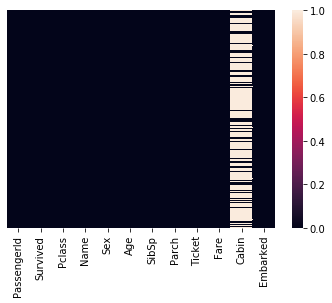

In [28]:
sns.heatmap(train_df.isnull(),yticklabels=False) #yticklabels is made false as we dont want data for all rows ie the records of different person

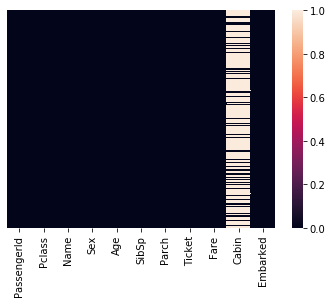

In [29]:
sns.heatmap(test_df.isnull(),yticklabels=False) #yticklabels is made false as we dont want data for all rows ie the records of different person

So we replaced all nan values of age with avg value of that pclass

In [30]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

Cabin column dropped as lot of null values

In [32]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [33]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Converting  Categorical Feature

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


See we don't need Name Ticket and passenger id so remove these columns

In [0]:
train_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
PassengerId=test_df['PassengerId']
test_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
test=test_df.copy()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


**Using get_dummies**

In [48]:
x=train_df.iloc[:,1:]
y=train_df.iloc[:,0]
y.head()

test=test_df.copy()
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [49]:
embarked=pd.get_dummies(train_df['Embarked'],drop_first=True) #drop first removes 1st out of 3 categorical features as it is true when both of these are 00
sex=pd.get_dummies(train_df['Sex'],drop_first=True)# when male false so female true so removed female column
sex.head()
embarked_test=pd.get_dummies(test['Embarked'],drop_first=True) #drop first removes 1st out of 3 categorical features as it is true when both of these are 00
sex_test=pd.get_dummies(test['Sex'],drop_first=True)# when male false so female true so removed female column
sex_test.head()

,male
0,1
1,0
2,1
3,1
4,0


In [51]:
x=pd.concat([x,embarked,sex],axis=1)
x.head() #male representing Sex and Q S representing Embarked
test=pd.concat([test_df,embarked_test,sex_test],axis=1)
test.head() #male representing Sex and Q S representing Embarked

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S,male
0,3,male,34.5,0,0,7.8292,Q,1,0,1
1,3,female,47.0,1,0,7.0000,S,0,1,0
2,2,male,62.0,0,0,9.6875,Q,1,0,1
3,3,male,27.0,0,0,8.6625,S,0,1,1
4,3,female,22.0,1,1,12.2875,S,0,1,0


In [52]:
x.drop(['Sex','Embarked'],inplace=True,axis=1)
x.head() #Sex and Embarked removed as we have represented its categorical features
test.drop(['Sex','Embarked'],inplace=True,axis=1)
test.head() #Sex and Embarked removed as we have represented its categorical features


,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


# Splitting The DataSet

We split the training  data set so into xtest and xtrain.xtrain is used to train our model and xtest is used to test the accuracy of our model. we will then make predictions on test_df.

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
test_df=test.copy() #test contained the encoding of categorical features which is now given to test_df
x.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


# Feature Scaling

**A) Using Standard Scaler**

In [56]:
x_train.columns
x_test.columns
test_df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male'], dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male']]=sc_x.fit_transform(x_train)
x_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male']]=sc_x.fit_transform(x_test)
test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male']]=sc_x.fit_transform(test_df)

x_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
140,0.819251,-0.320085,-0.464452,1.959264,-0.331679,-0.31427,-1.628276,-1.372075
439,-0.380968,0.131576,-0.464452,-0.477410,-0.426405,-0.31427,0.614147,0.728823
817,-0.380968,0.131576,0.412710,0.740927,0.102620,-0.31427,-1.628276,0.728823
378,0.819251,-0.696470,-0.464452,-0.477410,-0.555896,-0.31427,-1.628276,0.728823
491,0.819251,-0.621193,-0.464452,-0.477410,-0.491276,-0.31427,0.614147,0.728823


In [58]:
y_train.head()

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [59]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0.873482,0.388310,-0.499470,-0.400248,-0.500263,2.843757,-1.350676,0.755929
1,0.873482,1.362112,0.616992,-0.400248,-0.515111,-0.351647,0.740370,-1.322876
2,-0.315819,2.530675,-0.499470,-0.400248,-0.466988,2.843757,-1.350676,0.755929
3,0.873482,-0.195972,-0.499470,-0.400248,-0.485342,-0.351647,0.740370,0.755929
4,0.873482,-0.585493,0.616992,0.619896,-0.420433,-0.351647,0.740370,-1.322876


So we have scaled all values  and no need to scale y here as it is only a classification. scale y if it is a linear regression problem

# Selecting a Machine Learning model using Pair Plot

Pair Plot helps us visualize data points distributed among 2 features taken at a time.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


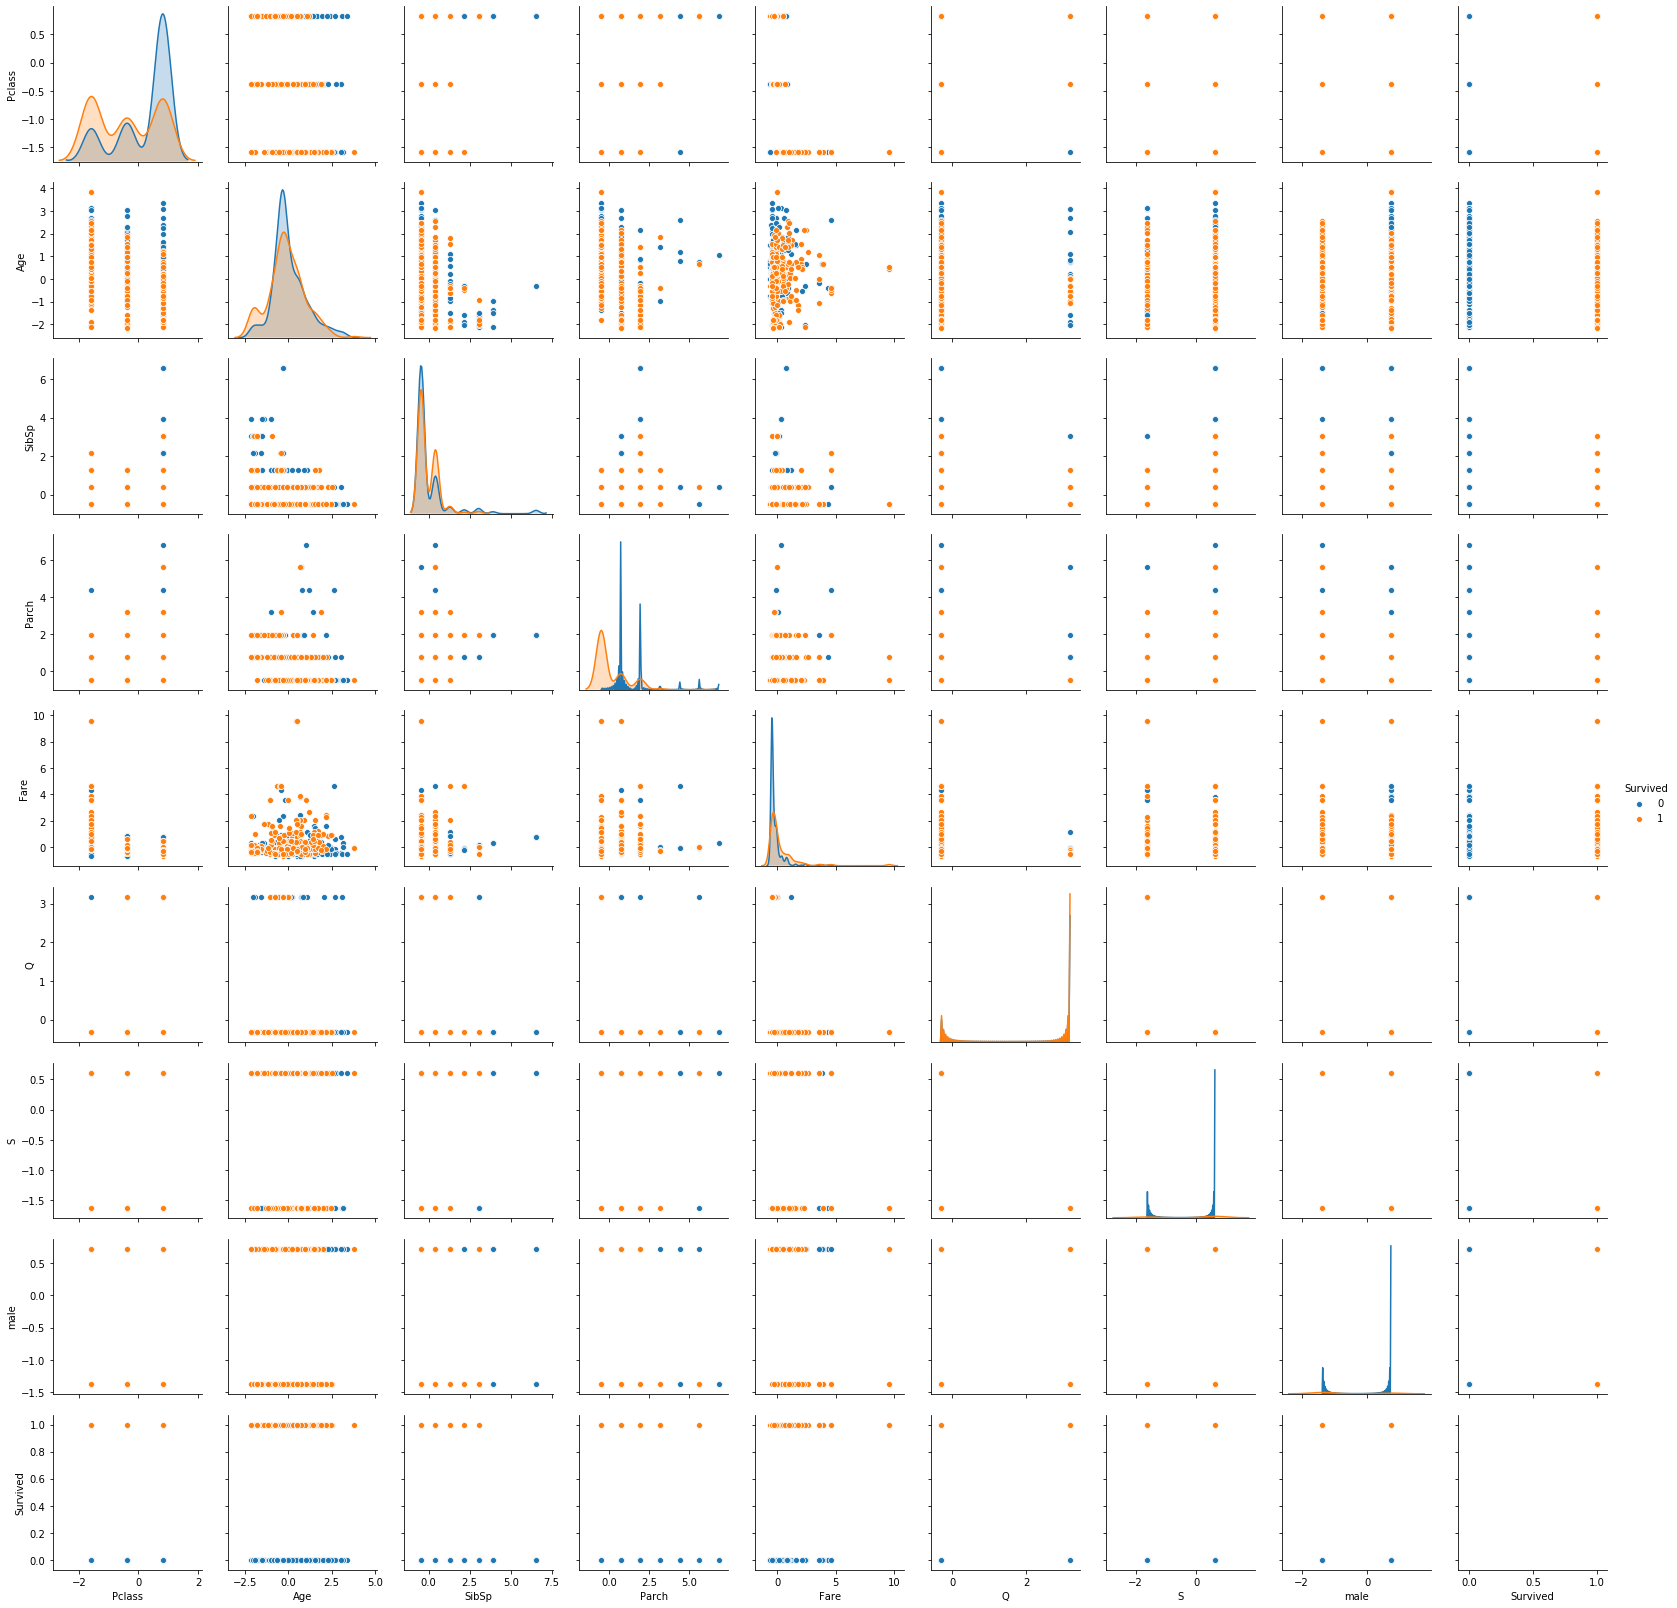

In [60]:
sns.pairplot(pd.concat([x_train,y_train],axis=1),hue='Survived')

See with the help of logistic regression we wont be able to separate the data points as it has a linear decision boundary.So we use KNN algorithm.

# Ml Model Using KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
y_pred=classifier.predict(x_test)
y_pred #These are our predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[100,  10],
       [ 21,  48]])

See confusion matrix helps to know wrong and right predictions.
Diagonal represent right predictions.
wrong predictions are 21 and 10 which is very less.

In [64]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8268156424581006

In [66]:

# test_df.iloc[150:155,:]
# test_df.iloc[150:155,5]
# test_df.iloc[150:155,:]
np.where(np.isnan(test_df))  #For checking where the nan values are


(array([], dtype=int64), array([], dtype=int64))

In [0]:
submission=pd.DataFrame({'PassengerId':PassengerId})
submission['Survived']=classifier.predict(test_df)

In [75]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [0]:
submission.to_csv('TitanicSubmission.csv',index=False)

In [85]:
print("no. of people survived:\n{}".format(submission[submission['Survived']==1].count()))
print("no. of people Died:\n{}".format(submission[submission['Survived']==0].count()))

no. of people survived:
PassengerId    163
Survived       163
dtype: int64
no. of people Died:
PassengerId    255
Survived       255
dtype: int64


Accuracy After Submission on Kaggle was around 78%